<a href="https://colab.research.google.com/github/vyshnavi-12/YBI-Foundation-Internships/blob/main/Internship_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of the Project : Movie Recommendation System**

### A **Movie Recommendation System** is a sophisticated tool used to suggest films to users based on various algorithms and data analysis techniques. These systems are designed to enhance the user experience by providing personalized suggestions that match the user's tastes and preferences. The primary goal of a movie recommendation system is to predict and recommend movies that a user is likely to enjoy. By analyzing user behavior, preferences, and interactions with movies, these systems can offer tailored recommendations, making it easier for users to discover new content that aligns with their interests.

###**Collaborative filtering** is a popular approach used in movie recommendation systems. It relies on the idea that users who have agreed in the past will agree in the future. There are two main types of collaborative filtering: user-based and item-based. User-based collaborative filtering recommends movies by finding users with similar preferences and suggesting films that those users have enjoyed. On the other hand, item-based collaborative filtering recommends movies by identifying items (movies) that are similar to those a user has liked in the past. This approach leverages the collective preferences of a large number of users to generate accurate and relevant recommendations.

###**Content-based filtering** is another method employed by movie recommendation systems. Unlike collaborative filtering, content-based filtering does not rely on user interactions but instead focuses on the attributes of the movies themselves. This method uses metadata such as genre, director, cast, and plot keywords to recommend movies with similar characteristics to those a user has previously enjoyed. By analyzing the content and features of movies, content-based filtering can provide recommendations based on the specific elements that appeal to a user's unique tastes. This approach is particularly useful when there is limited user data available, as it does not require a large user base to generate recommendations.

# **Objective**

### Develop a movie recommendation system using data visualization to explore genre, keyword, and director distributions, followed by data preprocessing to convert textual features into numerical representations. Utilize cosine similarity to build a model that recommends movies based on user input, providing a personalized list of top recommendations.

# **Data Source**

### The movie dataset used for this recommendation system is provided by the YBI Foundation and hosted on GitHub, allowing easy access via a direct URL. It includes features such as movie titles, genres, keywords, taglines, cast, and directors. The dataset is read into a pandas DataFrame for analysis and modeling. Key steps involve visualizing the distribution of genres, keywords, and directors, preprocessing the data by combining features into single strings and converting them into numerical vectors using TF-IDF vectorization, and building a recommendation model using cosine similarity. This data facilitates generating personalized movie recommendations based on user input.

# **Step 1: Import Library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import difflib
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 2: Import Data**

In [ ]:
df=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Movies%20Recommendation.csv')

# S**tep 3: Describe Data**

In [ ]:
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [ ]:
df.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
df.shape

(4760, 21)

In [ ]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

# **Step 4: Data Visualization**

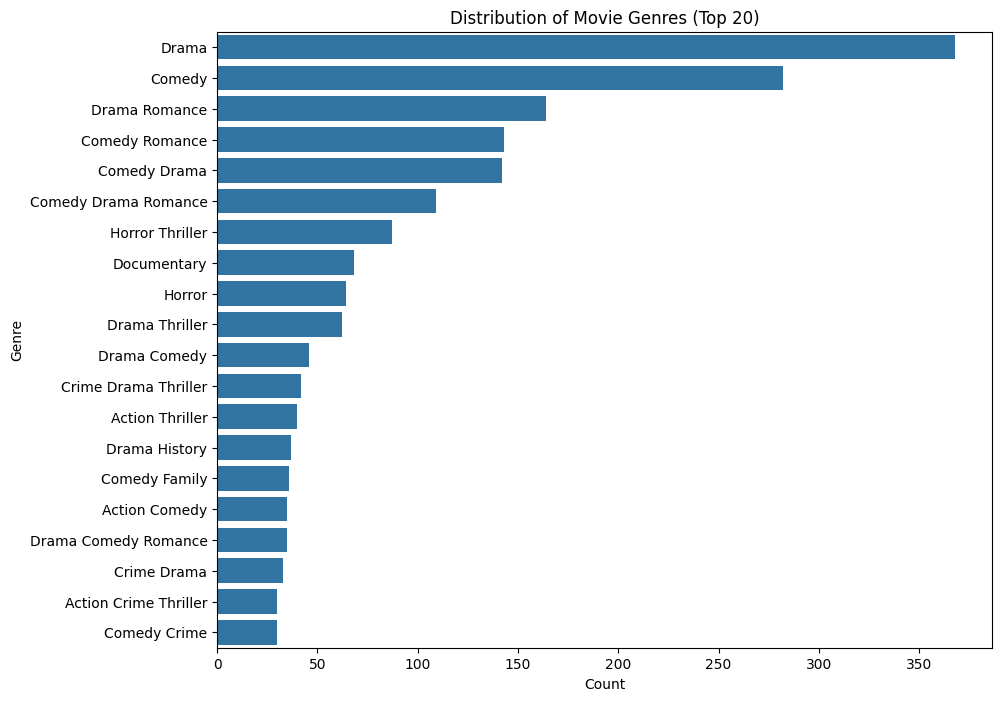

In [ ]:
# Visualize the distribution of movie genres with limited values on y-axis (for easy visualization the genre is limited to top 20)
plt.figure(figsize=(10, 8))
sns.countplot(y='Movie_Genre', data=df, order=df['Movie_Genre'].value_counts().index[:20])
plt.title('Distribution of Movie Genres (Top 20)')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

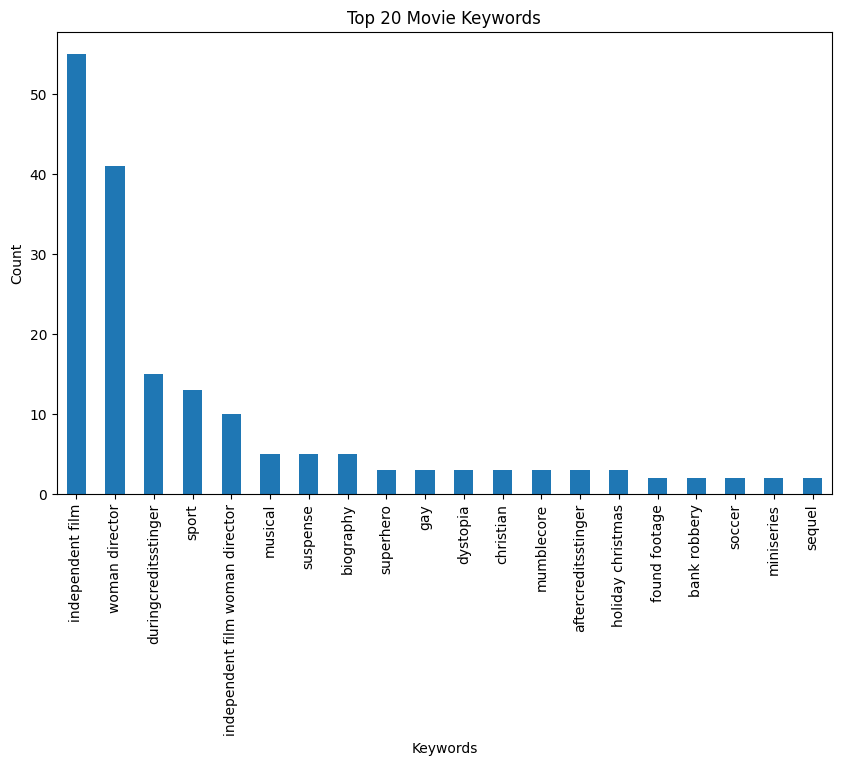

In [ ]:
# Visualize the distribution of movie keywords with limited values (for easy visualization the genre is limited to top 20 most frequent movie keywords from dataset)
plt.figure(figsize=(10, 6))
df['Movie_Keywords'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Top 20 Movie Keywords')
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.show()


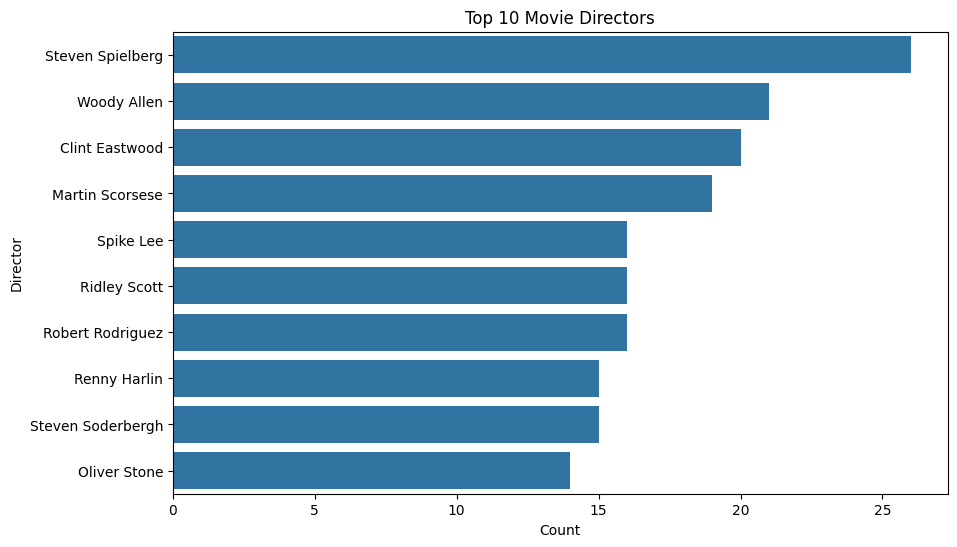

In [ ]:
# Visualize the distribution of movies by director with limited values (for easy visualization the genre is limited to top 10 directors with the most movies in dataset)
plt.figure(figsize=(10, 6))
sns.countplot(y='Movie_Director', data=df, order=df['Movie_Director'].value_counts().index[:10])
plt.title('Top 10 Movie Directors')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()


# **Step 5: Data Preprocessing**

In [ ]:
# Get Feature Selection
df_features = df[['Movie_Genre', 'Movie_Keywords', 'Movie_Tagline', 'Movie_Cast', 'Movie_Director']].fillna('')
print(df_features.shape)
df_features

(4760, 5)


,Movie_Genre,Movie_Keywords,Movie_Tagline,Movie_Cast,Movie_Director
0,Crime Comedy,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders
1,Adventure Action Science Fiction,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas
2,Animation Family,father son relationship harbor underwater fish...,"There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,Andrew Stanton
3,Comedy Drama Romance,vietnam veteran hippie mentally disabled runni...,"The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,Robert Zemeckis
4,Drama,male nudity female nudity adultery midlife cri...,Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,Sam Mendes
...,...,...,...,...,...
4755,Horror,,The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,Pece Dingo
4756,Comedy Family Drama,,It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,Frank Lotito
4757,Thriller Drama,christian film sex trafficking,She never knew it could happen to her...,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,Jaco Booyens
4758,Family,,,,


In [ ]:
# Combine selected features into a single string for each movie
X = df_features['Movie_Genre'] + ' ' + df_features['Movie_Keywords'] + ' ' + df_features['Movie_Tagline'] + ' ' + df_features['Movie_Cast'] + ' ' + df_features['Movie_Director']
print(X.shape)
X

(4760,)


0       Crime Comedy hotel new year's eve witch bet ho...
1       Adventure Action Science Fiction android galax...
2       Animation Family father son relationship harbo...
3       Comedy Drama Romance vietnam veteran hippie me...
4       Drama male nudity female nudity adultery midli...
                              ...                        
4755    Horror  The hot spot where Satan's waitin'. Li...
4756    Comedy Family Drama  It’s better to stand out ...
4757    Thriller Drama christian film sex trafficking ...
4758                                           Family    
4759    Documentary music actors legendary perfomer cl...
Length: 4760, dtype: object

# **Step 6: Define Target Variable (y) and Feature Variables (X)**

In [ ]:
# Get Feature Text Conversion to Tokens
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)
print(X.shape)
print(X)

(4760, 17258)
  (0, 617)	0.1633382144407513
  (0, 492)	0.1432591540388685
  (0, 15413)	0.1465525095337543
  (0, 9675)	0.14226057295252661
  (0, 9465)	0.1659841367820977
  (0, 1390)	0.16898383612799558
  (0, 7825)	0.09799561597509843
  (0, 1214)	0.13865857545144072
  (0, 729)	0.13415063359531618
  (0, 13093)	0.1432591540388685
  (0, 15355)	0.10477815972666779
  (0, 9048)	0.0866842116160778
  (0, 11161)	0.06250380151644369
  (0, 16773)	0.17654247479915475
  (0, 5612)	0.08603537588547631
  (0, 16735)	0.10690083751525419
  (0, 7904)	0.13348000542112332
  (0, 15219)	0.09800472886453934
  (0, 11242)	0.07277788238484746
  (0, 3878)	0.11998399582562203
  (0, 5499)	0.11454057510303811
  (0, 7071)	0.19822417598406614
  (0, 7454)	0.14745635785412262
  (0, 1495)	0.19712637387361423
  (0, 9206)	0.15186283580984414
  :	:
  (4757, 5455)	0.12491480594769522
  (4757, 2967)	0.16273475835631626
  (4757, 8464)	0.23522565554066333
  (4757, 6938)	0.17088173678136628
  (4757, 8379)	0.17480603856721913
  (475

# **Step 7: Train Test Split**

### In the context of a content-based movie recommendation system using cosine similarity, the concept of a traditional "train-test split" as used in supervised learning doesn't directly apply. Content-based filtering systems like this one do not involve training a model on labeled data and then evaluating its performance on unseen test data. Instead, they rely on the similarity scores computed from the entire dataset to recommend items (movies in this case) based on similarities to user preferences.



# **Step 8: Model Building**

In [ ]:
# Get Similarity Score using Cosine Similarity
Similarity_Score = cosine_similarity(X)
print(Similarity_Score)
print(Similarity_Score.shape)


[[1.         0.01351235 0.03570468 ... 0.         0.         0.        ]
 [0.01351235 1.         0.00806674 ... 0.         0.         0.        ]
 [0.03570468 0.00806674 1.         ... 0.         0.08014876 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.08014876 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
(4760, 4760)


# **Step 9: Prediction**

In [ ]:
Favourite_Movie_Name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : avataar


In [ ]:
All_Movies_Title_List = df['Movie_Title'].tolist()

In [ ]:
Movie_Recommendation = difflib.get_close_matches(Favourite_Movie_Name, All_Movies_Title_List)
print(Movie_Recommendation)

['Avatar']


In [ ]:
Close_Match = Movie_Recommendation[0]
print(Close_Match)

Avatar


In [ ]:
Index_of_Close_Match = df[df.Movie_Title == Close_Match].index[0]
print(Index_of_Close_Match)

2691


In [ ]:
#getting list of similar movies

Recommendation_score = list(enumerate(Similarity_Score[Index_of_Close_Match]))
print(Recommendation_score)

[(0, 0.012608324618212452), (1, 0.030738867381126255), (2, 0.004150602242112317), (3, 0.03362559032343266), (4, 0.022857098325255457), (5, 0.0), (6, 0.10581770345313189), (7, 0.0722802849242845), (8, 0.0), (9, 0.03544967138485472), (10, 0.01147604586902065), (11, 0.05891217082853316), (12, 0.044525662652113385), (13, 0.0), (14, 0.004426374794993366), (15, 0.026316985777821995), (16, 0.0), (17, 0.027193809391195596), (18, 0.004638397169508411), (19, 0.042620071311142725), (20, 0.0), (21, 0.0), (22, 0.028330034112742007), (23, 0.012732541214945953), (24, 0.0), (25, 0.028741892648168135), (26, 0.0), (27, 0.02958728762477544), (28, 0.0540290540139654), (29, 0.012101035437861177), (30, 0.02220803035873756), (31, 0.030922962419969675), (32, 0.0189616571128896), (33, 0.004274910591940438), (34, 0.0), (35, 0.04798372165999852), (36, 0.019714567688546944), (37, 0.040287427429390635), (38, 0.012306649140405364), (39, 0.06020281445630927), (40, 0.015481973877084873), (41, 0.015302632130183812), (

In [ ]:
len(Recommendation_score)

4760

# **Step 10: Model Evaluation**

In [ ]:
# Sorting the movies based on their similarity score
Sorted_Similar_Movies = sorted(Recommendation_score, key=lambda x: x[1], reverse=True)
print(Sorted_Similar_Movies)

[(2691, 1.0000000000000002), (160, 0.24875527845346676), (303, 0.24837445262406738), (4041, 0.24497918205666774), (4238, 0.20373524214202682), (3532, 0.20101779776780332), (413, 0.1966936190145403), (1056, 0.17999610776076175), (3079, 0.17635893561178484), (3452, 0.17423389647646303), (2471, 0.17422660074714663), (314, 0.16815961149851275), (1966, 0.16491186880203174), (1706, 0.1605757584847718), (919, 0.15631524409152814), (3323, 0.15475562206007498), (3850, 0.15206390560963193), (1097, 0.15016325290754176), (3138, 0.1491966901907035), (3993, 0.14653495814608652), (1748, 0.14479019836754506), (2641, 0.14222474533061377), (4676, 0.14009904745612026), (1349, 0.1387423990606545), (220, 0.13484283042562598), (769, 0.13450712434572068), (397, 0.13276568436099517), (2233, 0.132447921264427), (1651, 0.13005177896417897), (460, 0.1257778712466571), (102, 0.12478503598227086), (977, 0.12147851462386683), (1401, 0.12139193926677481), (364, 0.11981898839444152), (2884, 0.11933300381332093), (166

In [ ]:
# Print the name of the similar movies based on the index
print('Top 30 Movies Suggested for You: \n')

i = 1
for movie in Sorted_Similar_Movies:
    index = movie[0]
    title_from_index = df[df.index == index]['Movie_Title'].values[0]
    if i < 31:
        print(i, '.', title_from_index)
        i += 1

Top 30 Movies Suggested for You: 

1 . Avatar
2 . Alien
3 . Aliens
4 . Guardians of the Galaxy
5 . Star Trek Beyond
6 . Star Trek Into Darkness
7 . Galaxy Quest
8 . Alien³
9 . Cargo
10 . Gravity
11 . Trekkies
12 . Moonraker
13 . Jason X
14 . Pocahontas
15 . Space Cowboys
16 . The Helix... Loaded
17 . Lockout
18 . Event Horizon
19 . Space Dogs
20 . Machete Kills
21 . Gettysburg
22 . Clash of the Titans
23 . Star Wars: Clone Wars: Volume 1
24 . The Right Stuff
25 . Terminator Salvation
26 . The Astronaut's Wife
27 . Planet of the Apes
28 . Star Trek
29 . Wing Commander
30 . Sunshine


# **Top 10 Movie Recommendation System**

In [ ]:
Movie_Name = input(' Enter your favourite movie name : ')

list_of_all_titles = df['Movie_Title'].tolist()

Find_Close_Match = difflib.get_close_matches(Movie_Name, list_of_all_titles)

Close_Match = Find_Close_Match[0]

Index_of_Movie = df[df.Movie_Title == Close_Match]['Movie_ID'].values[0]

Recommendation_score = list(enumerate(Similarity_Score[Index_of_Movie]))

Sorted_Similar_Movies = sorted(Recommendation_score, key = lambda x:x[1], reverse = True)

print('Top 10 Movies Suggested for You : \n')

i = 1

for movie in Sorted_Similar_Movies:
  index = movie[0]
  title_from_index = df[df.index==index]['Movie_Title'].values[0]
  if (i<11):
    print(i, '.',title_from_index)
    i+=1


 Enter your favourite movie name : avatar
Top 10 Movies Suggested for You : 

1 . Niagara
2 . Caravans
3 . My Week with Marilyn
4 . Brokeback Mountain
5 . Harry Brown
6 . Night of the Living Dead
7 . The Curse of Downers Grove
8 . The Boy Next Door
9 . Back to the Future
10 . The Juror


# **Explanation :**

# **# Step 1: Import Library**

* ### **pandas**: Essential for data manipulation and analysis. It's used here to read data from a CSV file into a DataFrame (df).

* ### **numpy**: Provides support for large, multi-dimensional arrays and matrices, essential for numerical computations which may be needed during preprocessing or calculations.

* ### **TfidfVectorizer**: A method from sklearn.feature_extraction.text that converts a collection of raw documents into a matrix of TF-IDF features. This is crucial for transforming textual movie features into numerical representations suitable for machine learning.

* ### **cosine_similarity**: A function from sklearn.metrics.pairwise used to compute the cosine similarity between vectors. It's used later to calculate similarity scores between movies based on their TF-IDF representations.

* ### **difflib**: Provides tools for comparing sequences. Here, it's used to find the closest match to a user-input movie title from a list of all movie titles in the dataset.

* ### **matplotlib.pyplot and seaborn**: These libraries are used for data visualization. matplotlib.pyplot provides basic plotting functions, while seaborn enhances visual aesthetics and provides additional plot types and features.



# **# Step 2: Import Data**

* ### Uses pd.read_csv from pandas to read a CSV file directly from a URL (GitHub in this case) into a pandas DataFrame (df). This DataFrame contains the movie dataset which includes columns like 'Movie_Title', 'Movie_Genre', 'Movie_Keywords', etc.

# **# Step 3: Describe Data**

* ### **df.head()**: Displays the first few rows of the DataFrame, giving a quick look at what kind of data is present.

* ### **df.info()**: Provides a concise summary of the DataFrame including the number of entries, column data types, and memory usage. Useful for understanding missing values (NaN) and potential data type issues.

* ### **df.describe()**: Generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's distribution. This includes count, mean, standard deviation, minimum, maximum, and various percentiles for numerical columns.

* ### **df.shape**: Returns a tuple representing the dimensions of the DataFrame (rows, columns), giving an overview of the dataset's size.

* ### **df.columns**: Provides the list of column names in the DataFrame, helpful for understanding what features are available for analysis and modeling.



# **# Step 4: Data Visualization**

* ### **Movie Genre**s: Uses sns.countplot from seaborn to visualize the distribution of movie genres (Movie_Genre). This helps in understanding the most common genres in the dataset.

* ### **Movie Keywords**: Plots the top 20 movie keywords (Movie_Keywords) using a bar chart. This visualization gives insight into frequently occurring keywords associated with movies in the dataset.

* ### **Movie Directors**: Displays the top 10 movie directors (Movie_Director) based on the count of movies directed. This visualization identifies the most prolific directors in the dataset.


# **# Step 5: Data Preprocessing**

* ### **Feature Selection**: Selects specific textual features (Movie_Genre, Movie_Keywords, etc.) from the DataFrame. fillna('') is used to fill any missing values with empty strings.

* ### **Combine Features**: Concatenates selected features into a single string (X) for each movie, which is necessary for TF-IDF vectorization.



# **# Step 6: Define Target Variable (y) and Feature Variables (X)**

* ### **TF-IDF Vectorization**: Uses TfidfVectorizer to convert the textual data (X) into numerical vectors. TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.
* ### **Target Variable (y):** Typically, in a supervised learning context, the target variable (y) is the variable we want to predict based on the features (X). However, in the context of movie recommendation systems using content-based filtering and cosine similarity, there's no explicit target variable like in supervised learning tasks. Instead, the system recommends movies based on similarity scores computed from the cosine similarity matrix.

# **# Step 7: Train Split Test**

 * ### if you were exploring a hybrid recommendation system that combines content-based and collaborative filtering approaches, or if you were evaluating the effectiveness of your recommendation system using historical user interactions (which could be considered as feedback for training and testing), then a train-test split might be relevant.

 * ### **Train-Test Split**: The train_test_split function divides the dataset (df) into two subsets: train_data and test_data. This split is typically used in supervised learning to evaluate model performance on unseen data.

* ### **Content-Based Filtering**: Use train_data to fit the TF-IDF vectorizer and calculate similarity scores based on textual features. This part remains similar to the previous steps outlined in the content-based filtering approach.

* ### **Collaborative Filtering (Conceptual)**: If incorporating collaborative filtering, use user-item interactions (like ratings) from train_data to build collaborative filtering models. This could involve techniques like matrix factorization or nearest neighbors.

# **# Step 8:Model Building**

* ### **Cosine Similarity**: Computes similarity scores (Similarity_Score) between all pairs of movies  based on their TF-IDF vectors (X). Cosine similarity measures the cosine of the angle between two non-zero vectors and is widely used in information retrieval and recommendation systems.

# **# Step 9: Prediction**

* ### **User Input**: Takes user input (Favourite_Movie_Name) for their favorite movie.

* ### **Close Match**: Uses difflib.get_close_matches to find the closest match (Close_Match) to the user's input among all movie titles (All_Movies_Title_List).

* ### **Index Retrieval**: Finds the index (Index_of_Close_Match) of the closest matching movie title in the DataFrame.

* ### **Similarity Scores**: Retrieves similarity scores (Recommendation_score) between the selected movie (based on Index_of_Close_Match) and all other movies in the dataset using the cosine similarity scores computed earlier.

# **# Step 10: Model Evaluation**

* ### **Sorting**: Sorts the Recommendation_score list of tuples based on the similarity score (x[1]), in descending order (reverse=True).

* ### **Top Recommendations**: Prints the top 30 movies suggested for the user based on their favorite movie input. It retrieves the movie titles (title_from_index) using the index (index) from the sorted similarity scores.